In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
!pip install -U textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 4.9 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [3]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 6.0 MB/s 


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer= SentimentIntensityAnalyzer()
sentence = "This is a VADER Example"
analyzer.polarity_scores(sentence)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [5]:
import pandas as pd
from numpy import nan
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

data = pd.read_csv("/drive/My Drive/Colab Notebooks/data/CCST Survey_20221109_Text_Answers.csv")
data=data['teaching.tools.feedback'].values
print(data)
#drop NA values in dataframe
data=[item for item in data if not(pd.isnull(item)) == True]
print(data)


[nan nan nan ... nan nan nan]
['See feedback from earlier comment about Blackboard.', 'Timing of changes is terrible', 'Access to Blackboard support is challenging. Once I get to the staff they are very competent and responsive.', 'International students accessing class and materials from some countries cannot access Google tools because of firewalls. ', 'I have had some unique challenges with playposit, kaltura and blackboard. I understand that my use cases are not the typical use cases.', 'Mid-semester changes have been made to teaching stations in certain classrooms without any kind of notice. This kind of alteration should be abstained from during the fall and spring semesters- save it for between semesters or during the summer.', 'I feel like the online teaching group has been pretty good about communicating resources. They have also been very prompt when I email with questions.', 'Answers is not a reliable resource for support and the Kaltura interface is not user friendly.', 'Se

In [6]:
scores =[]

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [8]:
for sentence in data:
    score = analyser.polarity_scores(sentence)
    scores.append(score)
    
#Converting List of Dictionaries into Dataframe
dataFrame= pd.DataFrame(scores)

print(dataFrame)

print("Overall Sentiment Score for the multiple sentences :- ",dataFrame.mean())

       neg    neu    pos  compound
0    0.000  1.000  0.000    0.0000
1    0.437  0.563  0.000   -0.4767
2    0.000  0.592  0.408    0.8251
3    0.000  1.000  0.000    0.0000
4    0.000  0.944  0.056    0.0772
..     ...    ...    ...       ...
142  0.000  0.702  0.298    0.5267
143  0.000  1.000  0.000    0.0000
144  0.000  1.000  0.000    0.0000
145  0.108  0.892  0.000   -0.6486
146  0.000  0.783  0.217    0.9305

[147 rows x 4 columns]
Overall Sentiment Score for the multiple sentences :-  neg         0.058469
neu         0.791837
pos         0.149694
compound    0.254057
dtype: float64


In [9]:
dataFrame['Max'] = dataFrame.idxmax(axis=1)

In [10]:
dataFrame

,neg,neu,pos,compound,Max
0,0.000,1.000,0.000,0.0000,neu
1,0.437,0.563,0.000,-0.4767,neu
2,0.000,0.592,0.408,0.8251,compound
3,0.000,1.000,0.000,0.0000,neu
4,0.000,0.944,0.056,0.0772,neu
...,...,...,...,...,...
142,0.000,0.702,0.298,0.5267,neu
143,0.000,1.000,0.000,0.0000,neu
144,0.000,1.000,0.000,0.0000,neu
145,0.108,0.892,0.000,-0.6486,neu


# Histogram

In [11]:
import pandas as pd
from numpy import nan
import matplotlib.pyplot as plt
import numpy as np

In [12]:
dataFrame['Max'].unique()

array(['neu', 'compound', 'pos', 'neg'], dtype=object)

In [13]:
klist=['neu', 'compound', 'pos', 'neg']

In [14]:
corpus = dataFrame['Max'].tolist()
print(corpus)

['neu', 'neu', 'compound', 'neu', 'neu', 'neu', 'compound', 'neu', 'neu', 'compound', 'compound', 'neu', 'neu', 'compound', 'neu', 'neu', 'compound', 'neu', 'compound', 'neu', 'neu', 'neu', 'neu', 'neu', 'compound', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'compound', 'neu', 'neu', 'neu', 'compound', 'neu', 'compound', 'neu', 'neu', 'neu', 'compound', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'compound', 'neu', 'neu', 'neu', 'compound', 'compound', 'neu', 'neu', 'neu', 'neu', 'compound', 'compound', 'pos', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'compound', 'compound', 'compound', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'compound', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'compound', 'neu', 'neu', 'compound', 'neu', 'compound', 'neu', 'compound', 'compound', 'compound', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'compound', 'neu', 'compound', 'compound', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'compound

In [15]:
#find the frequency of each word in the document in all non-overlapping matchs of pattern 
freq={}
for word in corpus:
    count=freq.get(word,0)
    freq[word]=count + 1
    
#store all words in frequency_list    
frequency_list = freq.keys()
frequency_list

dict_keys(['neu', 'compound', 'pos', 'neg'])

In [16]:
#set a column to store the words and their frequency
results = []

#if the word appears in the document, record this word and its frequency from the document 
for words in frequency_list:
    if words in klist:
            #store the (word, frequency) in a tuple
            tuple = (words, freq[words])
            results.append(tuple)
            #print the people words' frequency
            print(words + '   ' + str(freq[words]))        
# The following output shows how many times words in the dictionary show up in the given document 

neu   109
compound   35
pos   2
neg   1


In [17]:
#descending order of frequency
byFreq=sorted(results, key=lambda word: word[1], reverse=True)

# store the results in two lists
words_names=[]
words_count=[]
for (word, freq) in byFreq:
    print (word, freq)
    words_names.append(word)
    words_count.append(freq)

neu 109
compound 35
pos 2
neg 1


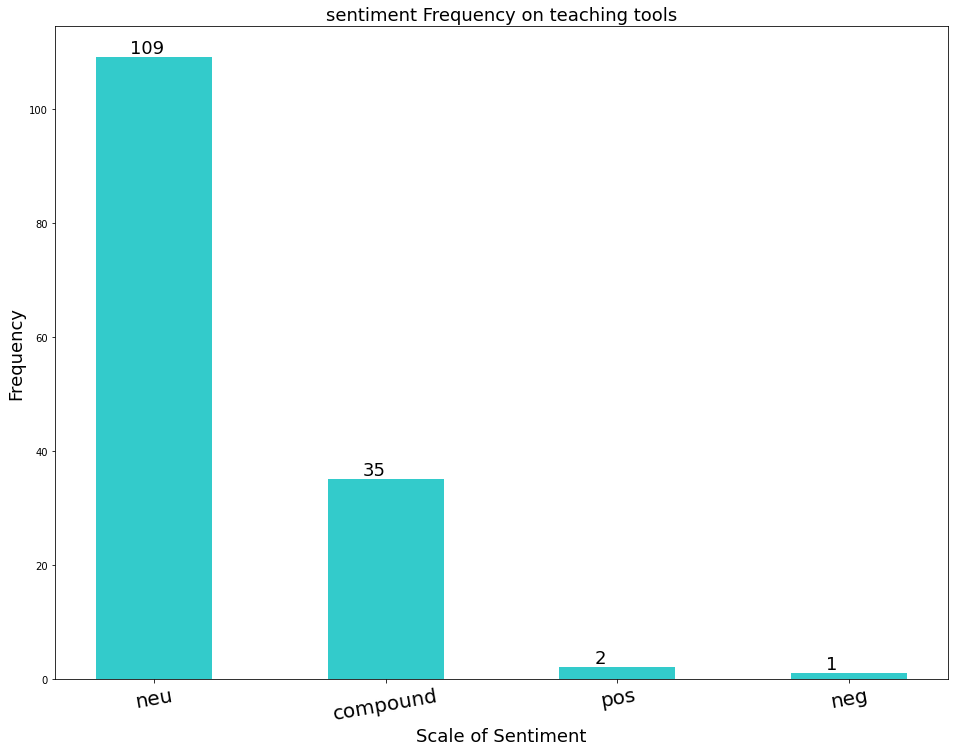

In [18]:
# Plot histogram using matplotlib bar
plt.figure(figsize=(16,12))
plt.xlabel('Scale of Sentiment',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title('sentiment Frequency on teaching tools',fontsize=18)
indexes = np.arange(len(words_names))
width = 0.5
plt.bar(indexes, words_count, width, align='edge',color = 'c',alpha=0.8)
plt.xticks(indexes + width * 0.5, words_names, size='medium',rotation=10,fontsize=20)
for a,b in zip(indexes,words_count):

    plt.text(a+0.15, b+0.05, '%.0f' % b, ha='left', va= 'bottom',fontsize=18)
plt.show()